# Outlier removal using IQR
* Used when the attribute has a skewed distribution
* IQR = Q3-Q1
* Min = Q1-1.5*IQR
* Max = Q3+1.5*IQR

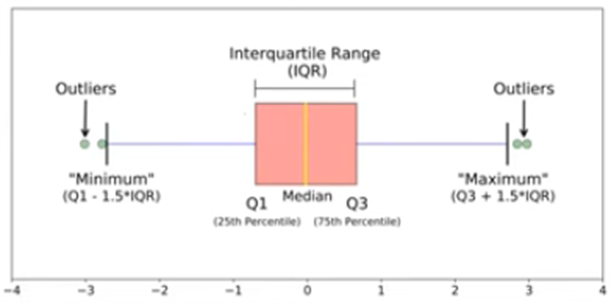

In [18]:
# Load dataset
import numpy as np
import pandas as pd

df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


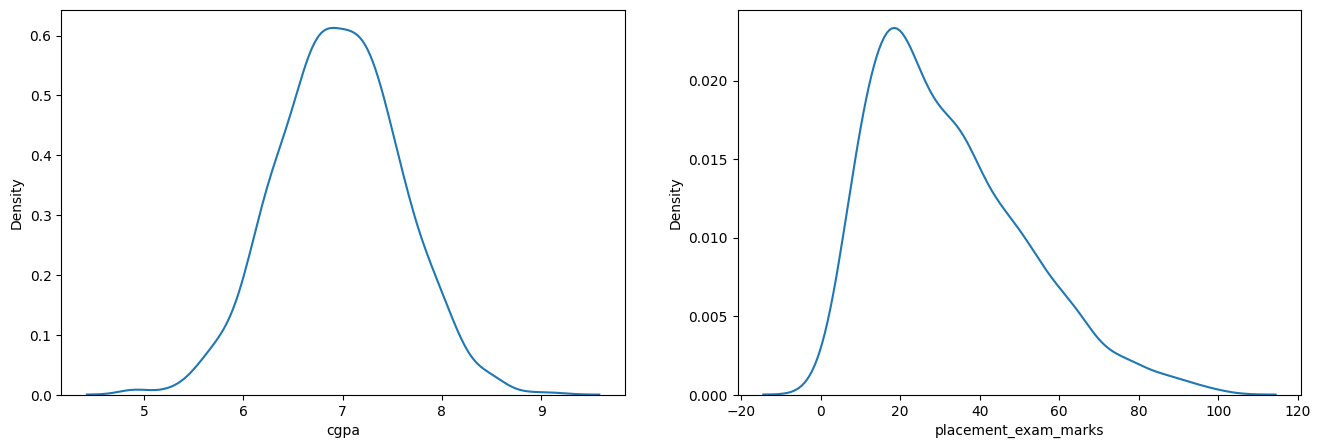

In [2]:
# Plotting kdeplot of cgpa and placement_marks => Only placement_marks is skewed
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [3]:
# Viewing statistics of placement_exam_marks
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

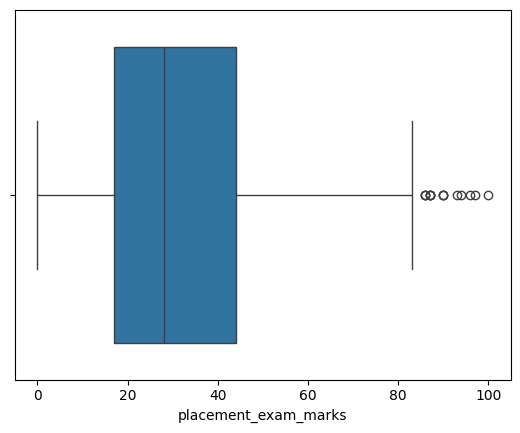

In [5]:
# Plotting boxplot of placement_exam_marks
sns.boxplot(x=df['placement_exam_marks'])

In [6]:
# Finding the boundary values :- (Q1-1.5*IQR to Q3+1.5*IQR)
q1, q3 = df['placement_exam_marks'].quantile([0.25, 0.75])
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

print("Heighest :- ", upper)
print("Lowest :- ", lower)

Heighest :-  84.5
Lowest :-  -23.5


In [7]:
# Finding the outliers
df[(df['placement_exam_marks']>84.5) | (df['placement_exam_marks']<-23.5)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## Trimming - Removing outliers

In [13]:
# Trimming
q1, q3 = df['placement_exam_marks'].quantile([0.25, 0.75])
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

new_df = df[(df['placement_exam_marks']<upper) & (df['placement_exam_marks']>lower)]

In [14]:
new_df.shape

(985, 3)

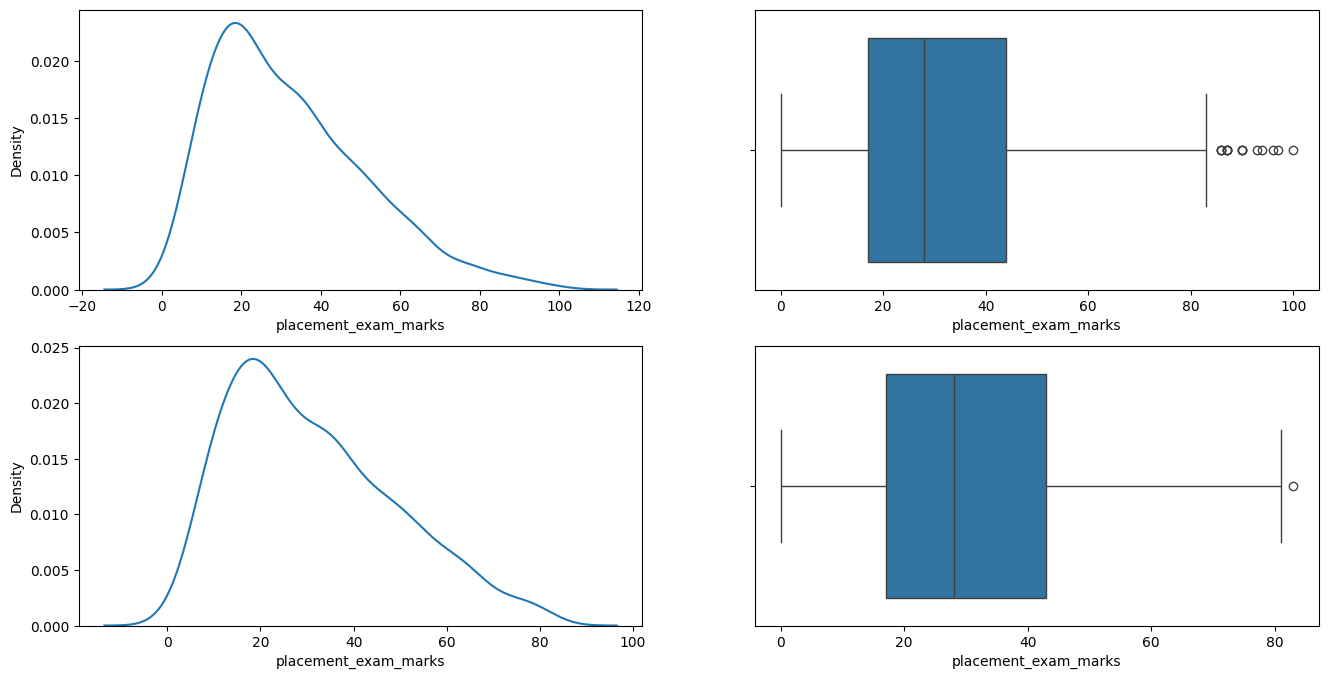

In [15]:
# Before and after kdeplot and boxplot of placement_exam_marks
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.show()

## Capping outliers :- Replacing outliers

In [19]:
new_df = df.copy()

In [20]:
# Capping
q1, q3 = df['placement_exam_marks'].quantile([0.25, 0.75])
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

new_df['placement_exam_marks'] = df['placement_exam_marks'].clip(lower, upper)

In [22]:
new_df.shape

(1000, 3)

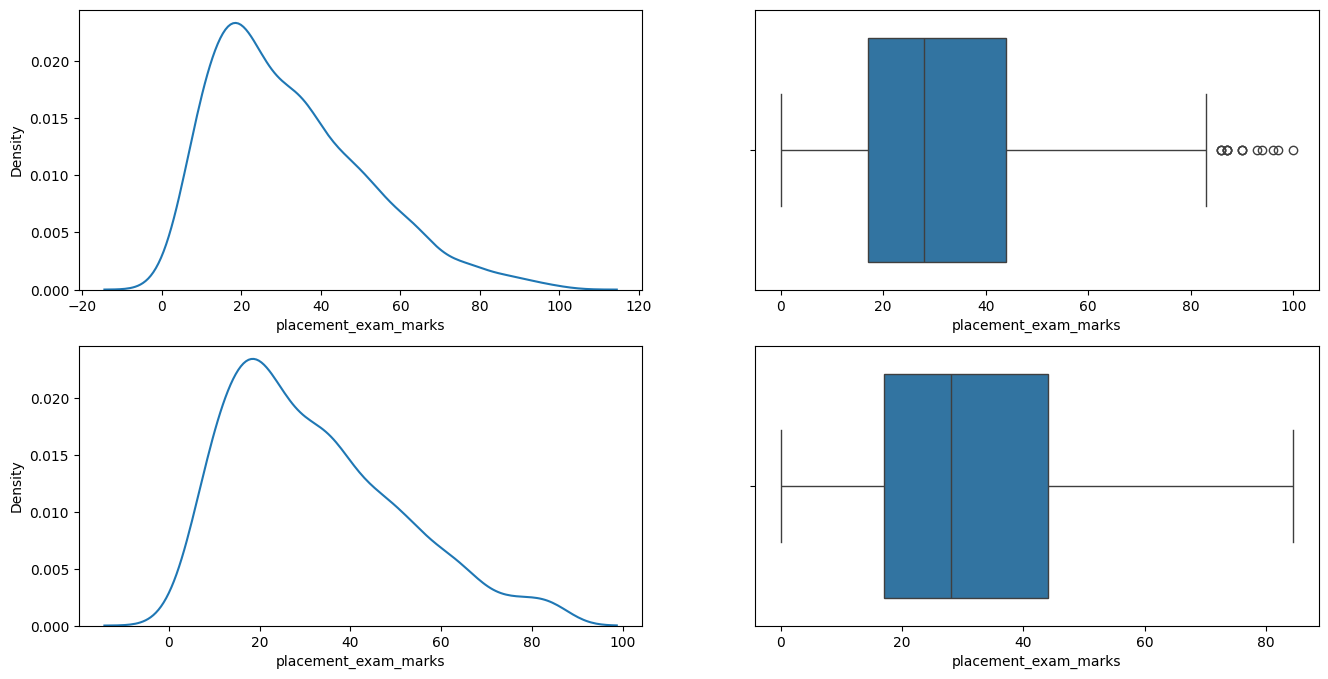

In [21]:
# Before and after kdeplot and boxplot of placement_exam_marks
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df['placement_exam_marks'])

plt.show()